In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# List all physical devices
physical_devices = tf.config.list_physical_devices()
print("Physical devices:", physical_devices)

# Check for GPU specifically
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU is available.")
else:
    print("GPU is NOT available.")

2024-02-20 21:44:33.307940: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-20 21:44:33.352253: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-20 21:44:33.899347: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Physical devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
GPU is NOT available.


2024-02-20 21:44:34.758203: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-02-20 21:44:34.758242: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: AR-GPU
2024-02-20 21:44:34.758266: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: AR-GPU
2024-02-20 21:44:34.758352: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 510.85.2
2024-02-20 21:44:34.758366: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 510.85.2
2024-02-20 21:44:34.758369: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 510.85.2


In [2]:
# Load your dataset
dataset = pd.read_csv('../../../Dataset/Exoskeleton/Original.csv')  # Replace with your dataset path
dataset.iloc[:, -1] = dataset.iloc[:, -1] - 1
X = dataset.iloc[:, :-2]  # Features
y = dataset.iloc[:, -2] -1  # Target
X

,IMU1_GyroX_Mean,IMU1_GyroX_StdDev,IMU1_GyroX_RMS,IMU1_GyroX_Amp,IMU1_GyroY_Mean,IMU1_GyroY_StdDev,IMU1_GyroY_RMS,IMU1_GyroY_Amp,IMU1_GyroZ_Mean,IMU1_GyroZ_StdDev,...,OFS_FIB_IMNF,EMG_EMG_Mean,EMG_EMG_StdDev,EMG_EMG_RMS,EMG_EMG_Amp,EMG_EMG_MNF,EMG_EMG_MDF,EMG_EMG_IMNF,Age,BMI
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,1.282506,100.000000,100.000000,100.000000,100.000000,0.293036,0.230724,22.334139,24,27.250887
1,7.026579,198.259304,199.601392,184.295571,610.020298,175.334986,178.265684,192.958297,-30.466274,188.025193,...,1.147393,107.150748,71.239481,103.936460,81.656880,0.142451,0.181664,8.384712,24,27.250887
2,-7082.108609,568.164429,593.320009,727.671625,9456.718907,610.892516,672.664608,744.159826,-744.252427,567.506829,...,0.989183,247.044115,611.569045,306.910586,514.609792,0.385845,0.234438,8.372799,24,27.250887
3,3618.245437,1537.254629,1540.972428,1855.355638,4828.685519,2177.145176,2187.176663,2466.309254,-638.476505,1500.476246,...,0.912529,713.389659,1127.501511,767.921875,968.529167,0.426387,0.192446,7.684195,24,27.250887
4,-1539.312493,2426.076723,2428.697877,2399.474310,-5421.387863,4325.733672,4335.967864,4673.869608,173.236814,1786.550574,...,0.880923,2214.542677,4157.944918,2493.259693,3969.429341,0.501780,0.220765,7.496121,24,27.250887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1828,1.764259,368.991733,368.247948,1534.561927,-0.311389,139.779641,139.496687,590.129262,7.109903,269.971731,...,0.808654,3.784144,2.975367,4.813325,10.521596,0.407665,0.208658,8.023430,30,30.346074
1829,0.475102,349.962108,349.301063,1483.874905,0.453211,144.938057,144.665591,602.595420,0.678974,273.597473,...,0.807963,3.661929,3.194020,4.858676,10.239955,0.395226,0.210199,9.214335,30,30.346074
1830,1.972435,328.861224,328.309039,1336.387882,3.336819,162.563803,162.325196,675.185751,-3.122483,270.265599,...,0.806151,6.071805,6.055941,8.574721,21.664981,0.400278,0.214340,7.786317,30,30.346074
1831,-0.824858,366.299038,365.628259,1428.214854,2.038201,166.471751,166.179372,671.038232,3.257283,275.674312,...,1.029054,5.424234,4.958792,7.348506,16.820162,0.440773,0.217625,8.059900,30,30.346074


In [3]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert labels to categorical
y_categorical = to_categorical(y)

# Shuffle the data
X_scaled, y_categorical = shuffle(X_scaled, y_categorical, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.2, random_state=42)

X_scaled

array([[ 0.06020544,  1.6001754 ,  1.58040524, ..., -0.23613307,
        -0.6239885 , -0.25724994],
       [ 0.00520685, -0.35564647, -0.35341826, ..., -0.44471697,
        -1.02545249, -0.16417599],
       [ 0.01356361, -0.36096332, -0.35849886, ..., -0.37188082,
        -0.6239885 ,  0.51517062],
       ...,
       [ 0.00182825, -0.36829142, -0.36842377, ..., -0.37227909,
        -0.6239885 , -0.62278157],
       [ 0.00405117, -0.38595741, -0.38364444, ...,  0.008841  ,
        -0.6239885 ,  1.79231515],
       [-0.03230592, -0.0653375 , -0.06268051, ..., -0.32938259,
        -0.6239885 , -0.55000462]])

In [4]:
# Number of unique classes in the target variable
num_classes = y_train.shape[1]
num_classes

3

In [5]:
# Building the DNN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), name='dense_0'),
    Dense(64, activation='relu', name='dense_1'),
    Dense(3, activation='relu', name='dense_2'),
    # Dense(3, activation='relu', name='dense_3'),
    Dense(num_classes, activation='softmax')  # Output layer
])

In [6]:
# Define the early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,  # minimium amount of change to count as an improvement
    patience=100,  # how many epochs to wait before stopping
    verbose=1,
    mode='min',
    restore_best_weights=True
)

# Set the learning rate
learning_rate = 0.01

# Create the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.9,  # factor by which the learning rate will be reduced
    patience=5,  # number of epochs with no improvement after which learning rate will be reduced
    min_lr=0.00001,  # lower bound on the learning rate
    verbose=1
)
lr_callback = tf.keras.callbacks.LearningRateScheduler(reduce_lr)

class PrintLR(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.learning_rates = []
        
    def on_epoch_begin(self, epoch, logs=None):
        lr = self.model.optimizer.lr
        if hasattr(lr, 'numpy'):
            lr = lr.numpy()
        elif hasattr(lr, 'eval'):
            lr = lr.eval(session=tf.compat.v1.Session())
        print(f'Epoch {epoch+1}: Learning rate is {lr}.')
    
    def on_epoch_end(self, epoch, logs=None):
        # Retrieve the current learning rate from the optimizer
        current_lr = tf.keras.backend.get_value(self.model.optimizer.lr)
        # Append the current learning rate to the list
        self.learning_rates.append(current_lr)

lr_tracker = PrintLR()
callbacks = [lr_tracker, early_stopping, reduce_lr]


# Initialize the optimizer with the learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compiling the model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Pass the callback to the fit method
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=1000,
    batch_size=32,
    callbacks=callbacks  # include it here
)

Epoch 1: Learning rate is 0.009999999776482582.
Epoch 1/1000
37/37 [==============================] - 1s 5ms/step - loss: 0.6418 - accuracy: 0.7654 - val_loss: 0.5671 - val_accuracy: 0.7993 - lr: 0.0100
Epoch 2: Learning rate is 0.009999999776482582.
Epoch 2/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.5132 - accuracy: 0.8089 - val_loss: 0.4845 - val_accuracy: 0.8095 - lr: 0.0100
Epoch 3: Learning rate is 0.009999999776482582.
Epoch 3/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.8131 - val_loss: 0.4706 - val_accuracy: 0.8061 - lr: 0.0100
Epoch 4: Learning rate is 0.009999999776482582.
Epoch 4/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8148 - val_loss: 0.4535 - val_accuracy: 0.8095 - lr: 0.0100
Epoch 5: Learning rate is 0.009999999776482582.
Epoch 5/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8174 - val_loss: 0.4256 - val_accuracy: 0.812

In [8]:
# Evaluating the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

12/12 [==============================] - 0s 982us/step - loss: 0.4702 - accuracy: 0.7956
Test accuracy: 0.7956403493881226
Test loss: 0.4701928496360779


In [9]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
confusion_matrix(y_test, y_pred)

12/12 [==============================] - 0s 867us/step


array([[154,   0,   0],
       [  5,   2,  70],
       [  0,   0, 136]])

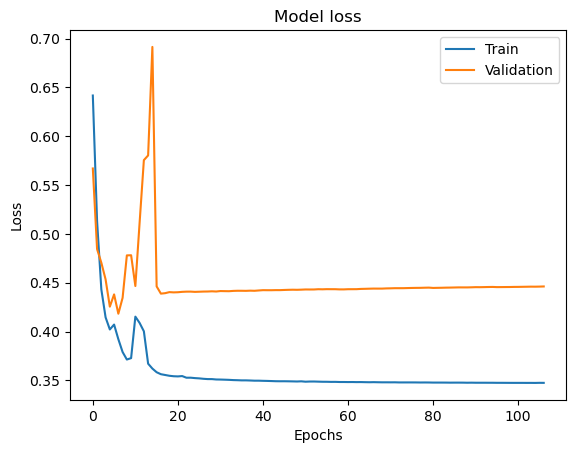

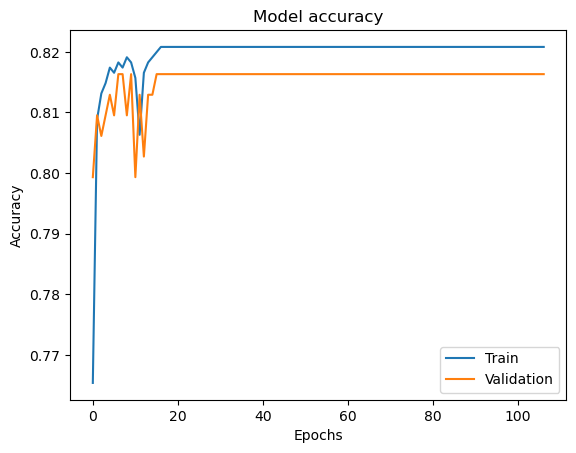

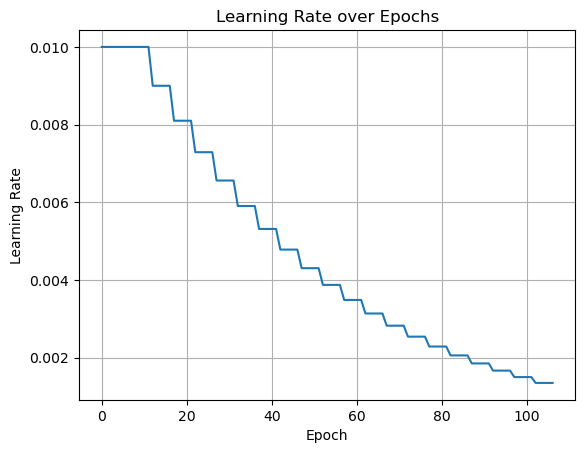

In [10]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Plotting
# plt.figure(figsize=(8, 8))
plt.plot(lr_tracker.learning_rates)
plt.title("Learning Rate over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.grid(True)

In [13]:
# Save the model
tf.keras.models.save_model(model, '/home/adam/FurtherResearch/Model/Exoskeleton/BMI/Exo_model_with_BMI')

INFO:tensorflow:Assets written to: /home/adam/FurtherResearch/Model/Exoskeleton/BMI/Exo_model_with_BMI/assets


INFO:tensorflow:Assets written to: /home/adam/FurtherResearch/Model/Exoskeleton/BMI/Exo_model_with_BMI/assets


In [14]:
from tensorflow.keras.models import Model

# model.summary()
# Assume 'original_model' is your pre-trained model
model_without_softmax = Model(inputs=model.input, 
                              outputs=model.get_layer("dense_2").output)
model_without_softmax.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_0_input (InputLayer)  [(None, 65)]              0         
                                                                 
 dense_0 (Dense)             (None, 128)               8448      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 16,899
Trainable params: 16,899
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Save the model
tf.keras.models.save_model(model_without_softmax, '/home/adam/FurtherResearch/Model/Exoskeleton/BMI/Exo_model_with_BMI_without_softmax')

INFO:tensorflow:Assets written to: /home/adam/FurtherResearch/Model/Exoskeleton/BMI/Exo_model_with_BMI_without_softmax/assets


INFO:tensorflow:Assets written to: /home/adam/FurtherResearch/Model/Exoskeleton/BMI/Exo_model_with_BMI_without_softmax/assets
